<a href="https://colab.research.google.com/github/BigM66/MLA_MLP/blob/main/LR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

In [ ]:
# mounts our notebook to our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import necessary libraries

In [ ]:
# imports all of our required items needed to run the programs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from statistics import median
from statistics import mean
from statistics import mode


In [ ]:
# Load our dataset
data=pd.read_csv('/content/drive/MyDrive/CS-430/archive/data.csv')
data.sample(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
3110,Honda,Crosstour,2014,regular unleaded,278.0,6.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Hatchback",Midsize,4dr Hatchback,30,20,2202,33690
3669,Mercedes-Benz,E-Class,2015,premium unleaded (required),329.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Luxury,Performance",Midsize,Coupe,29,20,617,53350
9257,GMC,Sierra 1500 Classic,2007,regular unleaded,310.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,17,13,549,32025
2537,Honda,Civic del Sol,1996,regular unleaded,106.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,29,2202,2000
11001,Toyota,Tundra,2016,regular unleaded,381.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Extended Cab Pickup,18,13,2031,38670


In [ ]:
# Check data


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [ ]:
# prints the number of rows and columns of our dataset
data.shape

(11914, 16)

In [ ]:
# prints out the names of the columns in our dataset
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
# prints out the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [ ]:
#prints any missing values from our columns

print(data.isnull().sum())


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [ ]:
# splits our data into 2 sets, one that is all categorical data, and one that is all numerical data
numerical_features = ['Year','Engine HP', 'Engine Cylinders', 'Number of Doors','highway MPG', 'city mpg', 'Popularity']
categorical_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [ ]:
from sklearn.preprocessing import StandardScaler

# scales our datat
scaler = StandardScaler()
data['MSRP'] = scaler.fit_transform(data[['MSRP']])



In [ ]:
# Calculate mean, median, mode, and standard deviation for numerical columns
import numpy as np

for column in numerical_features:
  print(f"Column: {column}")
  print(f"Mean: {mean(data[column].dropna())}")  # Drop NaN values before calculating mean
  print(f"Median: {median(data[column].dropna())}")
  try:
    print(f"Mode: {mode(data[column].dropna())}")
  except:
    print("Mode: Multiple modes or no mode")
  print(f"Standard Deviation: {np.std(data[column].dropna())}")
  print("-" * 20)


Column: Year
Mean: 2010.384337753903
Median: 2015.0
Mode: 2015
Standard Deviation: 7.579421778692449
--------------------
Column: Engine HP
Mean: 249.38607007176023
Median: 227.0
Mode: 200.0
Standard Deviation: 109.18726096516858
--------------------
Column: Engine Cylinders
Mean: 5.628828677213059
Median: 6.0
Mode: 4.0
Standard Deviation: 1.780484432527463
--------------------
Column: Number of Doors
Mean: 3.4360933825999327
Median: 4.0
Mode: 4.0
Standard Deviation: 0.8812783806257722
--------------------
Column: highway MPG
Mean: 26.637485311398354
Median: 26.0
Mode: 24
Standard Deviation: 8.86262880178069
--------------------
Column: city mpg
Mean: 19.73325499412456
Median: 18.0
Mode: 17
Standard Deviation: 8.987420957564437
--------------------
Column: Popularity
Mean: 1554.9111969111968
Median: 1385.0
Mode: 1385
Standard Deviation: 1441.7948343896103
--------------------


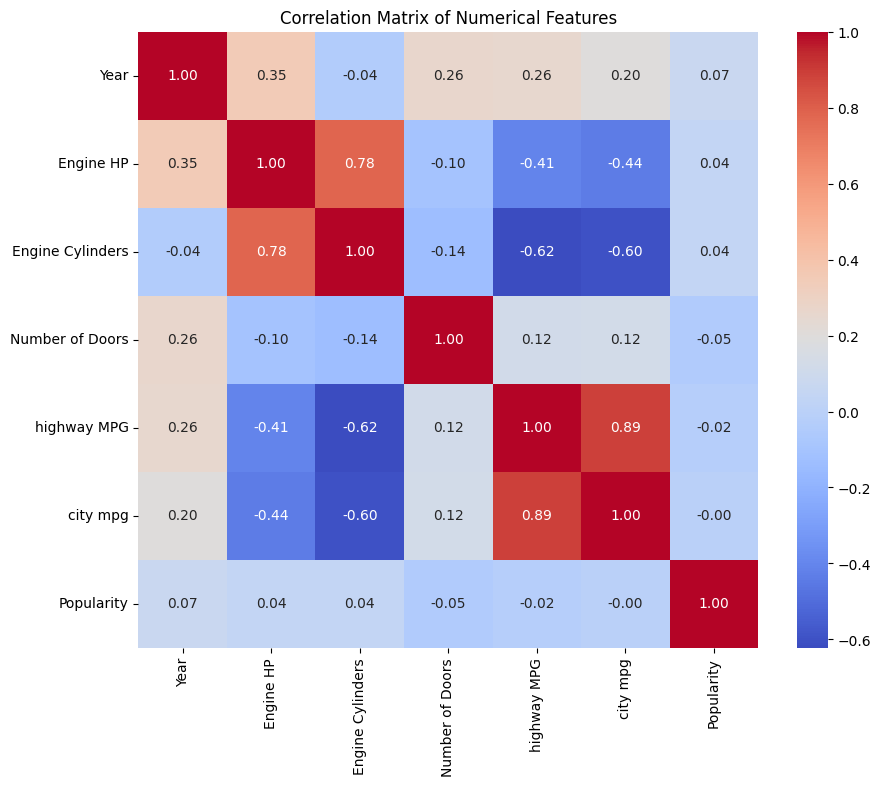

In [ ]:
#shows correlations between the numerical data

import matplotlib.pyplot as plt
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

(array([1.1661e+04, 2.1200e+02, 3.4000e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-0.64210501,  2.79163214,  6.22536929,  9.65910644, 13.09284359,
        16.52658074, 19.9603179 , 23.39405505, 26.8277922 , 30.26152935,
        33.6952665 ]),
 <BarContainer object of 10 artists>)

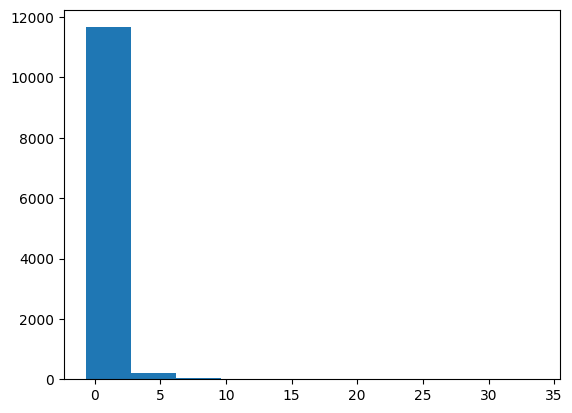

In [ ]:
# plots a histogram of our MSRP column
plt.hist(data['MSRP'])

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

In [ ]:

# heres a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data_filtered

# Remove outliers for numerical features
for feature in numerical_features:
    data = remove_outliers_iqr(data, feature)

print(data.shape)


(9534, 16)


### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [ ]:
# removes duplicated rows

data = data.drop_duplicates()
print(data.shape)


(9067, 16)


### Split into features and target

In [ ]:
# splits our data into x and y, with y being the MSRP, and x being everything else
X = data.drop('MSRP', axis=1)
y = data['MSRP']
X.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916


### Feature Engineering

In [ ]:
# shows some of our y data
y.head()

,MSRP
0,0.092174
1,0.000919
2,-0.070620
3,-0.185416
4,-0.101399


### Preprocessing Pipelines

In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




### Create a function to build and evaluate models using pipelines

In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=1)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0124
R² Score: 0.9325
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.0136
R² Score: 0.9259
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.1087
R² Score: 0.4074
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 0.0507
R² Score: 0.7234
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 0.0124
R² Score: 0.9325
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

# the most effecitve model that we used was the linear regression model. The linear regression and Ridge models both had very similar results. The worst performing model was the  Lasso model. The linear regression model being the best model is due to the fact that if we think about how our data is all connected, the price has a direct connection to every other aspect of our car. as the price goes up so do the other aspects of our cars, and as the price goes down so do the other aspects. This would indicate a linear regression. The lasso model is the worst performing model because there are so many different values of our MSRP, that it can not do a very accuarate and good job of regulating all these different prices, so it would not be very helpful to us for this data set as almoost every car would have a different price and Lasso tries to regulate and work with overfitting of our data. #


### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.